In [155]:
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [156]:
import pandas as pd 
import numpy as np

# Transactions Table

In [157]:
transactions_df = pd.read_csv(r'K:\courses\APPGAIN task\UsersTransactions_202406231512.csv')

In [159]:
transactions_df

,id,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator
0,1213989,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat
1,1213990,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat
2,1213991,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat
3,1213992,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat
4,1213993,1041242,SadakaGriha,SHJC_AE,10,AE,SMS,1/1/2021 7:58,6210,غسيل الكلي,etisalat
...,...,...,...,...,...,...,...,...,...,...,...
88761,9176023,123484582,waqfelm,IHSAN_AE,10,AE,SMS,6/23/2024 10:44,2215,وقف لطلاب العلم,إتصالات
88762,9176024,123484242,Water,AWQAFSH_AE,10,AE,SMS,6/23/2024 11:33,2117,Water Endowment,etisalat
88763,9176025,123486272,3elag,MWISH_AE,50,AE,SMS,6/23/2024 11:43,5555,تحقيق امنية,إتصالات
88764,9176026,1055039,None,FARAJ_AE,10,AE,SMS,6/23/2024 11:53,5147,فك كربة سجين,إتصالات


In [160]:
transactions_df.columns

Index(['id', 'userid', 'actid', 'orgid', 'amount', 'countryid', 'method',
       'date', 'shortCode', 'projcetName', 'operator'],
      dtype='object')

In [161]:
transactions_df.userid.nunique()

6605

# Users Table

In [162]:
users_df = pd.read_csv(r'K:\courses\APPGAIN task\Users_202406231529.csv')

In [163]:
users_df

,id,usagecounter,appver,datecreated
0,123490514,0,0.0.0,6/23/2024 16:23
1,123490513,0,0.0.0,6/23/2024 15:13
2,123490512,0,0.0.0,6/23/2024 15:07
3,123490511,0,0.0.0,6/23/2024 14:38
4,123490510,0,0.0.0,6/23/2024 12:26
...,...,...,...,...
79995,1032581,4,3.5,6/21/2018 9:39
79996,1032580,1,3.5,6/21/2018 6:39
79997,1032579,2,19,6/21/2018 5:30
79998,1032578,47,4.9.1,6/21/2018 4:18


In [164]:
users_df.columns

Index(['id', 'usagecounter', 'appver', 'datecreated'], dtype='object')

# Joined Table

P.S when both tables are joined, there are around 8000 transactions that get deleted because there are around 400 userids in the transactions table that don't have a matching id in the users table. There are 2 options here 
to choose from i think:
1. Don't join the two tables and only work with the features from the first table, this option will make the cluster lose its granularity because it's based only on one table.
2. Join the two tables to use both 'usagecounter' and 'datecreated' features, and lose the 8000 transactions but you will have a more granular clusters.

I chose Option 2, i believe if the data wasn't subsetted we wouldn't have faced this problem in the first place.

In [169]:
df = pd.merge(transactions_df, users_df, left_on='userid', right_on='id', how='inner')

In [170]:
df

,id_x,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator,id_y,usagecounter,appver,datecreated
0,1213989,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat,1041242,86,3.5,2/22/2019 9:02
1,1213990,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat,1041242,86,3.5,2/22/2019 9:02
2,1213991,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat,1041242,86,3.5,2/22/2019 9:02
3,1213992,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat,1041242,86,3.5,2/22/2019 9:02
4,1213993,1041242,SadakaGriha,SHJC_AE,10,AE,SMS,1/1/2021 7:58,6210,غسيل الكلي,etisalat,1041242,86,3.5,2/22/2019 9:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80657,9175974,123490507,tafregKorab,IHSAN_AE,10,AE,SMS,6/23/2024 6:40,2215,Pay off debts,إتصالات,123490507,1,0.0.0,6/23/2024 10:39
80658,9175975,123490507,tafregKorab,HAI_AE,10,AE,SMS,6/23/2024 6:40,2610,Relief as a breadwinner for 11 people,إتصالات,123490507,1,0.0.0,6/23/2024 10:39
80659,9175976,123490507,None,IHSAN_AE,10,AE,SMS,6/23/2024 6:41,2215,case521,إتصالات,123490507,1,0.0.0,6/23/2024 10:39
80660,9175999,123490510,KafartYmen,IHSAN_AE,100,AE,SMS,6/23/2024 8:27,4944,كفارة يمين,إتصالات,123490510,0,0.0.0,6/23/2024 12:26


In [171]:
df.dtypes

id_x             int64
userid           int64
actid           object
orgid           object
amount           int64
countryid       object
method          object
date            object
shortCode       object
projcetName     object
operator        object
id_y             int64
usagecounter     int64
appver          object
datecreated     object
dtype: object

In [172]:
# Shape comparison before and after the join operation
print("Transactions shape ->", transactions_df.shape)
print("Joined table shape ->", df.shape)
print(">>Around 8000 transactions lost<<")
print()
print("unique userid before the join operation ->", transactions_df.userid.nunique())
print("unique userid after the join operation ->", df.userid.nunique())
print("Around 400 userid present in transactions table and not in users table")

Transactions shape -> (88766, 11)
Joined table shape -> (80662, 15)
>>Around 8000 transactions lost<<

unique userid before the join operation -> 6605
unique userid after the join operation -> 6232
Around 400 userid present in transactions table and not in users table


# Feature Engineering

The table's features can't be used as a reference to cluster our users, that's why we have to generate our own features that represent the users behaviour out of the current table

### 1) Total transaction amount per user


In [173]:
total_amount = df.groupby('userid')['amount'].sum().rename("total_transaction_amount")

In [174]:
total_amount

userid
1032614      1515
1032622        20
1032631        50
1032642       110
1032877        50
             ... 
123490496      20
123490497      10
123490498      10
123490507      60
123490510     150
Name: total_transaction_amount, Length: 6232, dtype: int64

### 2) Average transaction amount per user



In [175]:
average_amount = df.groupby('userid')['amount'].mean().rename("average_transaction_amount")

In [176]:
average_amount

userid
1032614      48.870968
1032622      10.000000
1032631      50.000000
1032642      36.666667
1032877      50.000000
               ...    
123490496    10.000000
123490497    10.000000
123490498    10.000000
123490507    10.000000
123490510    75.000000
Name: average_transaction_amount, Length: 6232, dtype: float64

### 3) Number of transactions per user



In [177]:
transaction_count = df.groupby('userid').size().rename("transaction_count")

In [178]:
transaction_count

userid
1032614      31
1032622       2
1032631       1
1032642       3
1032877       1
             ..
123490496     2
123490497     1
123490498     1
123490507     6
123490510     2
Name: transaction_count, Length: 6232, dtype: int64

### 4) Preferred payment method (most common method used)



In [179]:
preferred_method = df.groupby('userid')['method'].agg(lambda x: x.mode()[0]).rename("preferred_payment_method")

In [180]:
preferred_method

userid
1032614      SMS
1032622      SMS
1032631      SMS
1032642      SMS
1032877      SMS
            ... 
123490496    SMS
123490497    SMS
123490498    SMS
123490507    SMS
123490510    SMS
Name: preferred_payment_method, Length: 6232, dtype: object

### 5) Country of most frequent transactions (countryid mode)



In [181]:
frequent_country = df.groupby('userid')['countryid'].agg(lambda x: x.mode()[0]).rename("frequent_country")

In [182]:
frequent_country

userid
1032614      AE
1032622      AE
1032631      AE
1032642      AE
1032877      AE
             ..
123490496    AE
123490497    AE
123490498    AE
123490507    AE
123490510    AE
Name: frequent_country, Length: 6232, dtype: object

### 6) Variety in actid (count of unique projects per user)


In [183]:
project_variety = df.groupby('userid')['actid'].nunique().rename("actid")

In [184]:
project_variety

userid
1032614      9
1032622      0
1032631      0
1032642      1
1032877      0
            ..
123490496    1
123490497    1
123490498    1
123490507    3
123490510    1
Name: actid, Length: 6232, dtype: int64

### 7) Time since the account was created


In [185]:
Creation_period = df.groupby('userid')['datecreated'].agg(lambda x: (pd.Timestamp.now() - pd.to_datetime(x, format= '%m/%d/%Y %H:%M')).mean().days).rename("Creation_period")

In [186]:
Creation_period

userid
1032614      2335
1032622      2335
1032631      2335
1032642      2335
1032877      2328
             ... 
123490496     143
123490497     143
123490498     143
123490507     142
123490510     142
Name: Creation_period, Length: 6232, dtype: int64

### 8) Usage Count by each user


In [187]:
usage_count = users_df[['id','usagecounter']]

In [188]:
usage_count

,id,usagecounter
0,123490514,0
1,123490513,0
2,123490512,0
3,123490511,0
4,123490510,0
...,...,...
79995,1032581,4
79996,1032580,1
79997,1032579,2
79998,1032578,47


### 9) Variety in orgid

In [189]:
org_variety = df.groupby('userid')['orgid'].nunique().rename("org_variety")

In [190]:
org_variety

userid
1032614      3
1032622      1
1032631      1
1032642      1
1032877      1
            ..
123490496    1
123490497    1
123490498    1
123490507    2
123490510    1
Name: org_variety, Length: 6232, dtype: int64

# Join All The Generated Features

- Now we have a new_df whose features will be used to cluster the data

In [194]:
new_df = pd.concat([total_amount, average_amount, transaction_count,
                           preferred_method, frequent_country, project_variety, Creation_period, org_variety], axis=1).reset_index()

In [195]:
new_df = pd.merge(new_df,usage_count, left_on = 'userid', right_on ='id')


In [196]:
new_df

,userid,total_transaction_amount,average_transaction_amount,transaction_count,preferred_payment_method,frequent_country,actid,Creation_period,org_variety,id,usagecounter
0,1032614,1515,48.870968,31,SMS,AE,9,2335,3,1032614,54
1,1032622,20,10.000000,2,SMS,AE,0,2335,1,1032622,31
2,1032631,50,50.000000,1,SMS,AE,0,2335,1,1032631,62
3,1032642,110,36.666667,3,SMS,AE,1,2335,1,1032642,25
4,1032877,50,50.000000,1,SMS,AE,0,2328,1,1032877,45
...,...,...,...,...,...,...,...,...,...,...,...
6227,123490496,20,10.000000,2,SMS,AE,1,143,1,123490496,0
6228,123490497,10,10.000000,1,SMS,AE,1,143,1,123490497,0
6229,123490498,10,10.000000,1,SMS,AE,1,143,1,123490498,0
6230,123490507,60,10.000000,6,SMS,AE,3,142,2,123490507,1


In [197]:
new_df.drop(columns=['id'],inplace=True)


In [198]:
new_df

,userid,total_transaction_amount,average_transaction_amount,transaction_count,preferred_payment_method,frequent_country,actid,Creation_period,org_variety,usagecounter
0,1032614,1515,48.870968,31,SMS,AE,9,2335,3,54
1,1032622,20,10.000000,2,SMS,AE,0,2335,1,31
2,1032631,50,50.000000,1,SMS,AE,0,2335,1,62
3,1032642,110,36.666667,3,SMS,AE,1,2335,1,25
4,1032877,50,50.000000,1,SMS,AE,0,2328,1,45
...,...,...,...,...,...,...,...,...,...,...
6227,123490496,20,10.000000,2,SMS,AE,1,143,1,0
6228,123490497,10,10.000000,1,SMS,AE,1,143,1,0
6229,123490498,10,10.000000,1,SMS,AE,1,143,1,0
6230,123490507,60,10.000000,6,SMS,AE,3,142,2,1


In [199]:
new_df.userid.nunique()

6232

In [200]:
new_df.preferred_payment_method.value_counts()

SMS    6228
du        4
Name: preferred_payment_method, dtype: int64

In [201]:
new_df.frequent_country.value_counts()

AE    6230
OM       2
Name: frequent_country, dtype: int64

# Data Preprocessing

## 1) One-Hot Encoding

In [202]:
from sklearn.preprocessing import LabelEncoder

In [203]:
le = LabelEncoder()

In [204]:
new_df2 = new_df.copy()

In [205]:
# 0 -> sms, 1-> du 
new_df2['preferred_payment_method'] = le.fit_transform(new_df['preferred_payment_method'])
# 0 -> AE, 1 -> OM
new_df2['frequent_country'] = le.fit_transform(new_df['frequent_country'])

In [206]:
new_df2

,userid,total_transaction_amount,average_transaction_amount,transaction_count,preferred_payment_method,frequent_country,actid,Creation_period,org_variety,usagecounter
0,1032614,1515,48.870968,31,0,0,9,2335,3,54
1,1032622,20,10.000000,2,0,0,0,2335,1,31
2,1032631,50,50.000000,1,0,0,0,2335,1,62
3,1032642,110,36.666667,3,0,0,1,2335,1,25
4,1032877,50,50.000000,1,0,0,0,2328,1,45
...,...,...,...,...,...,...,...,...,...,...
6227,123490496,20,10.000000,2,0,0,1,143,1,0
6228,123490497,10,10.000000,1,0,0,1,143,1,0
6229,123490498,10,10.000000,1,0,0,1,143,1,0
6230,123490507,60,10.000000,6,0,0,3,142,2,1


# 2) Standardize the data

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
scaler = MinMaxScaler()

In [209]:
#total_transaction_amount
scaler.fit(new_df2[['total_transaction_amount']])
new_df2['total_transaction_amount'] = scaler.transform(new_df2[['total_transaction_amount']])

#average_transaction_amount
scaler.fit(new_df2[['average_transaction_amount']])
new_df2['average_transaction_amount'] = scaler.transform(new_df2[['average_transaction_amount']])

#transaction_count
scaler.fit(new_df2[['transaction_count']])
new_df2['transaction_count'] = scaler.transform(new_df2[['transaction_count']])

#preferred_payment_method
scaler.fit(new_df2[['preferred_payment_method']])
new_df2['preferred_payment_method'] = scaler.transform(new_df2[['preferred_payment_method']])

#frequent_country
scaler.fit(new_df2[['frequent_country']])
new_df2['frequent_country'] = scaler.transform(new_df2[['frequent_country']])

#actid
scaler.fit(new_df2[['actid']])
new_df2['actid'] = scaler.transform(new_df2[['actid']])

#Creation_period
scaler.fit(new_df2[['Creation_period']])
new_df2['Creation_period'] = scaler.transform(new_df2[['Creation_period']])

#usagecounter
scaler.fit(new_df2[['usagecounter']])
new_df2['usagecounter'] = scaler.transform(new_df2[['usagecounter']])

#org_variety
scaler.fit(new_df2[['org_variety']])
new_df2['org_variety'] = scaler.transform(new_df2[['org_variety']])

In [210]:
#Before standardization
new_df

,userid,total_transaction_amount,average_transaction_amount,transaction_count,preferred_payment_method,frequent_country,actid,Creation_period,org_variety,usagecounter
0,1032614,1515,48.870968,31,SMS,AE,9,2335,3,54
1,1032622,20,10.000000,2,SMS,AE,0,2335,1,31
2,1032631,50,50.000000,1,SMS,AE,0,2335,1,62
3,1032642,110,36.666667,3,SMS,AE,1,2335,1,25
4,1032877,50,50.000000,1,SMS,AE,0,2328,1,45
...,...,...,...,...,...,...,...,...,...,...
6227,123490496,20,10.000000,2,SMS,AE,1,143,1,0
6228,123490497,10,10.000000,1,SMS,AE,1,143,1,0
6229,123490498,10,10.000000,1,SMS,AE,1,143,1,0
6230,123490507,60,10.000000,6,SMS,AE,3,142,2,1


In [211]:
#After Standardaization
new_df2

,userid,total_transaction_amount,average_transaction_amount,transaction_count,preferred_payment_method,frequent_country,actid,Creation_period,org_variety,usagecounter
0,1032614,0.005409,0.047919,0.021262,0.0,0.0,0.126761,1.000000,0.136364,2.059157e-05
1,1032622,0.000068,0.009009,0.000709,0.0,0.0,0.000000,1.000000,0.045455,1.182109e-05
2,1032631,0.000175,0.049049,0.000000,0.0,0.0,0.000000,1.000000,0.045455,2.364218e-05
3,1032642,0.000389,0.035702,0.001417,0.0,0.0,0.014085,1.000000,0.045455,9.533136e-06
4,1032877,0.000175,0.049049,0.000000,0.0,0.0,0.000000,0.996808,0.045455,1.715964e-05
...,...,...,...,...,...,...,...,...,...,...
6227,123490496,0.000068,0.009009,0.000709,0.0,0.0,0.014085,0.000456,0.045455,0.000000e+00
6228,123490497,0.000032,0.009009,0.000000,0.0,0.0,0.014085,0.000456,0.045455,0.000000e+00
6229,123490498,0.000032,0.009009,0.000000,0.0,0.0,0.014085,0.000456,0.045455,0.000000e+00
6230,123490507,0.000211,0.009009,0.003544,0.0,0.0,0.042254,0.000000,0.090909,3.813254e-07


# K-means

In [212]:
from sklearn.cluster import KMeans

In [220]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(new_df2[['total_transaction_amount','average_transaction_amount', 'transaction_count', 'preferred_payment_method', 'frequent_country', 'actid', 'Creation_period', 'usagecounter', 'org_variety']])
y_predicted

C:\Users\karee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 1, 1])

In [214]:
new_df2['Cluster'] = y_predicted

In [215]:
new_df2

,userid,total_transaction_amount,average_transaction_amount,transaction_count,preferred_payment_method,frequent_country,actid,Creation_period,org_variety,usagecounter,Cluster
0,1032614,0.005409,0.047919,0.021262,0.0,0.0,0.126761,1.000000,0.136364,2.059157e-05,0
1,1032622,0.000068,0.009009,0.000709,0.0,0.0,0.000000,1.000000,0.045455,1.182109e-05,0
2,1032631,0.000175,0.049049,0.000000,0.0,0.0,0.000000,1.000000,0.045455,2.364218e-05,0
3,1032642,0.000389,0.035702,0.001417,0.0,0.0,0.014085,1.000000,0.045455,9.533136e-06,0
4,1032877,0.000175,0.049049,0.000000,0.0,0.0,0.000000,0.996808,0.045455,1.715964e-05,0
...,...,...,...,...,...,...,...,...,...,...,...
6227,123490496,0.000068,0.009009,0.000709,0.0,0.0,0.014085,0.000456,0.045455,0.000000e+00,1
6228,123490497,0.000032,0.009009,0.000000,0.0,0.0,0.014085,0.000456,0.045455,0.000000e+00,1
6229,123490498,0.000032,0.009009,0.000000,0.0,0.0,0.014085,0.000456,0.045455,0.000000e+00,1
6230,123490507,0.000211,0.009009,0.003544,0.0,0.0,0.042254,0.000000,0.090909,3.813254e-07,1


# Elbow Plot

In [216]:
from matplotlib import pyplot as plt

In [217]:
#Sum of Squared Error 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(new_df2[['total_transaction_amount','average_transaction_amount', 'transaction_count', 'preferred_payment_method', 'frequent_country', 'actid', 'Creation_period', 'usagecounter']])
    sse.append(km.inertia_)

C:\Users\karee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karee\anaconda3\lib\site-packages\sklearn\clust

In [218]:
sse

[618.3942903266882,
 209.48436991035445,
 153.25024186484856,
 115.78105942107544,
 97.71121378314554,
 85.98088213590967,
 77.63974455399126,
 70.77417368996116,
 64.19731057817711]

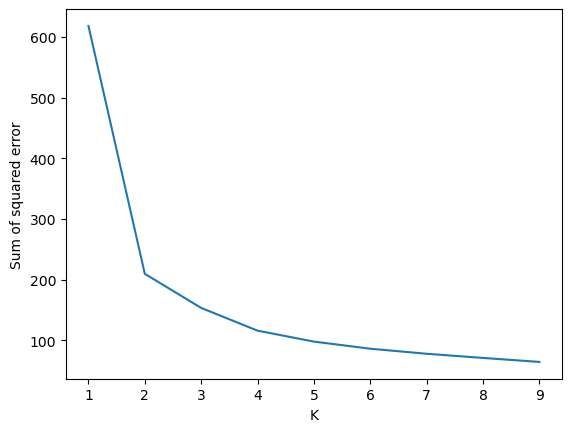

In [219]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

The correct number of clusters should've been 2.


# Clusters Visualization

In [221]:
km.cluster_centers_


array([[1.82658107e-03, 3.70249554e-02, 1.27280808e-02, 2.71186441e-03,
        2.81892565e-18, 5.19073765e-02, 4.37644586e-01, 1.45273380e-03,
        1.33713405e-01],
       [1.25922230e-03, 4.88675289e-02, 5.41305024e-03, 9.54097912e-18,
        5.90841950e-04, 4.44920632e-02, 1.07467631e-01, 6.17578213e-06,
        9.22519135e-02],
       [1.59934660e-03, 3.64975006e-02, 1.14086943e-02, 1.08420217e-17,
        5.42101086e-18, 4.87106311e-02, 7.81693741e-01, 2.75570295e-03,
        1.26126425e-01]])

In [222]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Perform PCA to reduce the dimensions for my new_df to 2 for visualization
pca_components = pca.fit_transform(new_df2[['total_transaction_amount', 'average_transaction_amount', 'transaction_count', 'preferred_payment_method', 
                                              'frequent_country', 'actid', 'Creation_period', 'usagecounter','org_variety']])

# Perform PCA to reduce the dimensions for my centroids to 2 for visualization
centroids_components = pca.fit_transform(km.cluster_centers_)

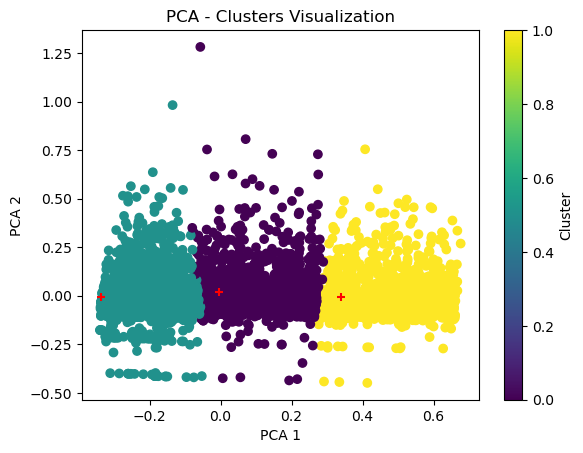

In [223]:
# Plotting the clusters using PCA components
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=km.labels_, cmap='viridis')

# Plotting the centroids
plt.scatter(centroids_components[:, 0], centroids_components[:, 1], marker='+', c='red')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA - Clusters Visualization')
plt.colorbar(label='Cluster')
plt.show()

# Save The CSV With The New 'Cluster' Column

In [224]:
cluster_df = new_df2[['userid','Cluster']]
cluster_df

,userid,Cluster
0,1032614,0
1,1032622,0
2,1032631,0
3,1032642,0
4,1032877,0
...,...,...
6227,123490496,1
6228,123490497,1
6229,123490498,1
6230,123490507,1


In [225]:
final_df = pd.merge(df, cluster_df, on= 'userid')
final_df.drop(columns=['id_y'], inplace=True)
final_df

,id_x,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator,usagecounter,appver,datecreated,Cluster
0,1213989,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat,86,3.5,2/22/2019 9:02,0
1,1213990,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat,86,3.5,2/22/2019 9:02,0
2,1213991,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat,86,3.5,2/22/2019 9:02,0
3,1213992,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat,86,3.5,2/22/2019 9:02,0
4,1213993,1041242,SadakaGriha,SHJC_AE,10,AE,SMS,1/1/2021 7:58,6210,غسيل الكلي,etisalat,86,3.5,2/22/2019 9:02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80657,9175974,123490507,tafregKorab,IHSAN_AE,10,AE,SMS,6/23/2024 6:40,2215,Pay off debts,إتصالات,1,0.0.0,6/23/2024 10:39,1
80658,9175975,123490507,tafregKorab,HAI_AE,10,AE,SMS,6/23/2024 6:40,2610,Relief as a breadwinner for 11 people,إتصالات,1,0.0.0,6/23/2024 10:39,1
80659,9175976,123490507,None,IHSAN_AE,10,AE,SMS,6/23/2024 6:41,2215,case521,إتصالات,1,0.0.0,6/23/2024 10:39,1
80660,9175999,123490510,KafartYmen,IHSAN_AE,100,AE,SMS,6/23/2024 8:27,4944,كفارة يمين,إتصالات,0,0.0.0,6/23/2024 12:26,1


In [226]:
final_df

,id_x,userid,actid,orgid,amount,countryid,method,date,shortCode,projcetName,operator,usagecounter,appver,datecreated,Cluster
0,1213989,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat,86,3.5,2/22/2019 9:02,0
1,1213990,1041242,kid3lag,HAI_AE,20,AE,SMS,1/1/2021 7:57,6620,other,etisalat,86,3.5,2/22/2019 9:02,0
2,1213991,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat,86,3.5,2/22/2019 9:02,0
3,1213992,1041242,SadakaGriha,IHSAN_AE,5,AE,SMS,1/1/2021 7:58,2217,الصدقة الجارية,etisalat,86,3.5,2/22/2019 9:02,0
4,1213993,1041242,SadakaGriha,SHJC_AE,10,AE,SMS,1/1/2021 7:58,6210,غسيل الكلي,etisalat,86,3.5,2/22/2019 9:02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80657,9175974,123490507,tafregKorab,IHSAN_AE,10,AE,SMS,6/23/2024 6:40,2215,Pay off debts,إتصالات,1,0.0.0,6/23/2024 10:39,1
80658,9175975,123490507,tafregKorab,HAI_AE,10,AE,SMS,6/23/2024 6:40,2610,Relief as a breadwinner for 11 people,إتصالات,1,0.0.0,6/23/2024 10:39,1
80659,9175976,123490507,None,IHSAN_AE,10,AE,SMS,6/23/2024 6:41,2215,case521,إتصالات,1,0.0.0,6/23/2024 10:39,1
80660,9175999,123490510,KafartYmen,IHSAN_AE,100,AE,SMS,6/23/2024 8:27,4944,كفارة يمين,إتصالات,0,0.0.0,6/23/2024 12:26,1


In [227]:
final_df.userid.nunique()

6232

In [228]:
final_df.Cluster.value_counts()


1    29218
2    27986
0    23458
Name: Cluster, dtype: int64

In [137]:
final_df.to_csv(r'K:\courses\APPGAIN task\file_name.csv', index=False)